# Part 1. Estimate the Species-Area Relationship (SAR)

As per normal, start by making a duplicate of this notebook (from the command palette), so that your work doesn't get in the way of the rest of the class. 

Let's practice estimating the SAR from some real data on the diversity of longhorned beetles that live in each of the Florida Keys (Cays). As we've done before, we'll read CSV-formated data into a R data frame.

As a reminder, you'll need to execute each code block in succession. (Click on a block and hit the play button above.)

In [1]:
data <- read.csv(text='Place,Area,Distance,S
Florida,149913,NA,213
South Florida,5080,NA,91
Key Largo,55.1,13,44
Matecumbe Key,4.3,32,16
Fat  Deer Key,3.7,66,12
Key Vaca,2.9,72,15
No Name Key,3.1,76,16
Big Pine Key,17.1,79,24
Big Torch Key,2.3,88,16
Cudjoe Key,9.2,95,8
Sugarloaf Key,10.2,100,10
Key West,11.9,121,24
Dry Tortugas,0.9,131,3')

Have a look at the data.

In [2]:
data # typing the variable name will print it's contents

Place,Area,Distance,S
Florida,149913.0,NA,213
South Florida,5080.0,NA,91
Key Largo,55.1,13,44
Matecumbe Key,4.3,32,16
Fat Deer Key,3.7,66,12
Key Vaca,2.9,72,15
No Name Key,3.1,76,16
Big Pine Key,17.1,79,24
Big Torch Key,2.3,88,16
Cudjoe Key,9.2,95,8


For each Key (and for chunks of the Floridian mainland) we've got a measure of total surface area (km^2), distance from the mainland (km), and S, that is, species richness.

The log-transformed version of the SAR equation is this: log(S) = log(c) + z * log(A).

That means that if we log tansform our Area and S estimates, we can fit the parameters c and z with simple linear regression. The convention is to use 10 as the base of the logarithm.

In [3]:
data$LogArea <- log(data$Area, base=10)
data$LogS <- log(data$S, base=10)
data

Place,Area,Distance,S,LogArea,LogS
Florida,149913.0,NA,213,5.17583930,2.3283796
South Florida,5080.0,NA,91,3.70586371,1.9590414
Key Largo,55.1,13,44,1.74115160,1.6434527
Matecumbe Key,4.3,32,16,0.63346846,1.2041200
Fat Deer Key,3.7,66,12,0.56820172,1.0791812
Key Vaca,2.9,72,15,0.46239800,1.1760913
No Name Key,3.1,76,16,0.49136169,1.2041200
Big Pine Key,17.1,79,24,1.23299611,1.3802112
Big Torch Key,2.3,88,16,0.36172784,1.2041200
Cudjoe Key,9.2,95,8,0.96378783,0.9030900


Simple linear regression in R can be done with the built-in linear model function, lm(), like so:

In [4]:
model <- lm(LogS ~ LogArea, data=data) 
#if you're curios, the fit is done with gradient descent optimization of the least-squares
#cost function.
summary(model) #this will print out parameter estimates


Call:
lm(formula = LogS ~ LogArea, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42998 -0.07424  0.10248  0.14318  0.22456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92021    0.07988  11.520 1.77e-07 ***
LogArea      0.28641    0.04094   6.996 2.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2098 on 11 degrees of freedom
Multiple R-squared:  0.8165,	Adjusted R-squared:  0.7998 
F-statistic: 48.94 on 1 and 11 DF,  p-value: 2.282e-05


OK. If you are familiar with linear regression, feel free to skip this chunk. If not, here's an explanation of the summary command's output. Let's start with the coefficients table. It's got two rows, one for each of the linear model's free parameters. The first row is for the y-intercept; the second is for the effect of LogArea. The table has 4 columns. The first, Estimate, is the estimated co-efficient. For the first row, that's the value of the y-intercept. For every other row (here there is just one), that's how much the response variable (LogS) changes with every unit change of the predictor variable (LogArea). The Std.Error tells us about the precision of the estimate. The Pr(>|t|) values are p-values; they tell us the Type I Error rate, that is, the probability of incorrectly rejecting the null hypothesis in a universe in which that null hypothesis is true. The null hypothesis intercept is zero, and the null hypothesis slope for all predictor variables is also zero. Small p-values are small probabilities that the null hypothesis is correct. Make sense?

All of the stuff about residuals, is telling us things about how much of the variance in our response variable (S) we were unable to explain with our predictor variables (the y-intercept, and the LogArea effect). Usually, you'll see this summed up the the R^2 value. Here, our R^2 is right around 0.8, which means that our model explains about 80% of the variance in S across Keys. Not bad at all.

Let's plot the data and our linear model.

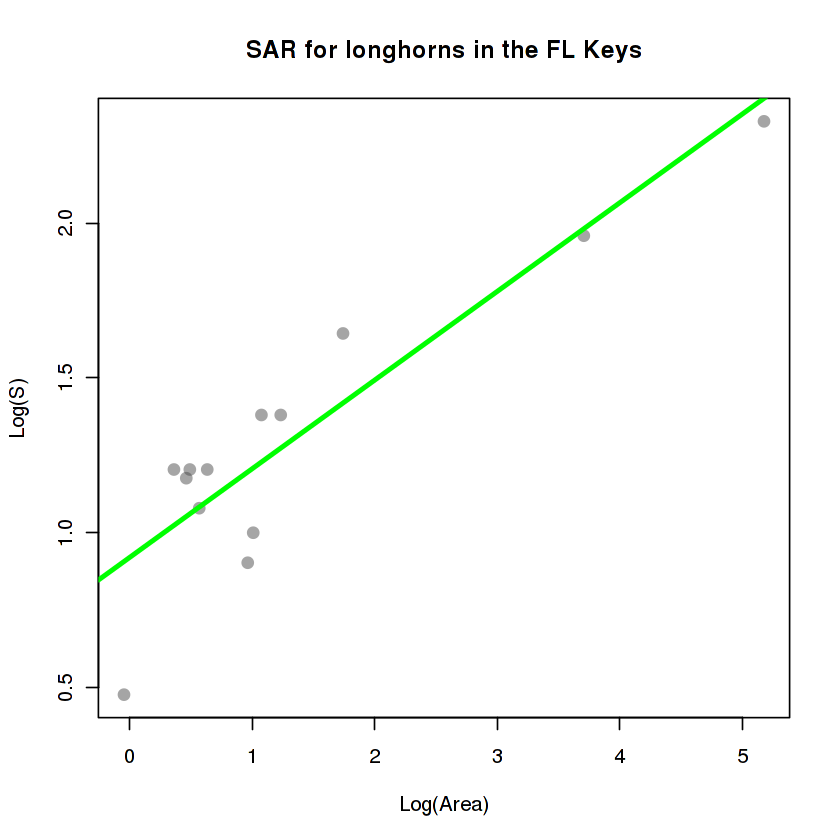

In [5]:
library(scales)
plot(data$LogS ~ data$LogArea, main='SAR for longhorns in the FL Keys', xlab='Log(Area)', ylab='Log(S)', col=alpha('gray30', 0.5), pch=16, cex=1.3)
abline(model, col='green', lwd=3)

This plot should look re-assuring. Each gray circle represents the species-richness (y-axis) of longhorned beetles on a Key, the area of which is represented by its position along the x-axis. A striaght line through log-log space does seem to nicely explain the relationship.

Recall from the reading that the SAR is one component of more general islandish-equilibrium models of species richness variation over space. In those models, we start thinking about the dynamic processes which add and delete species from an place. One adding process is immigration, and the probability of imigration is expected to decrease as a chunk of space moves farther away from a source pool of individuals. Let's plot the the relationship between Log(S) and the distance of a Key from the FL mainland.

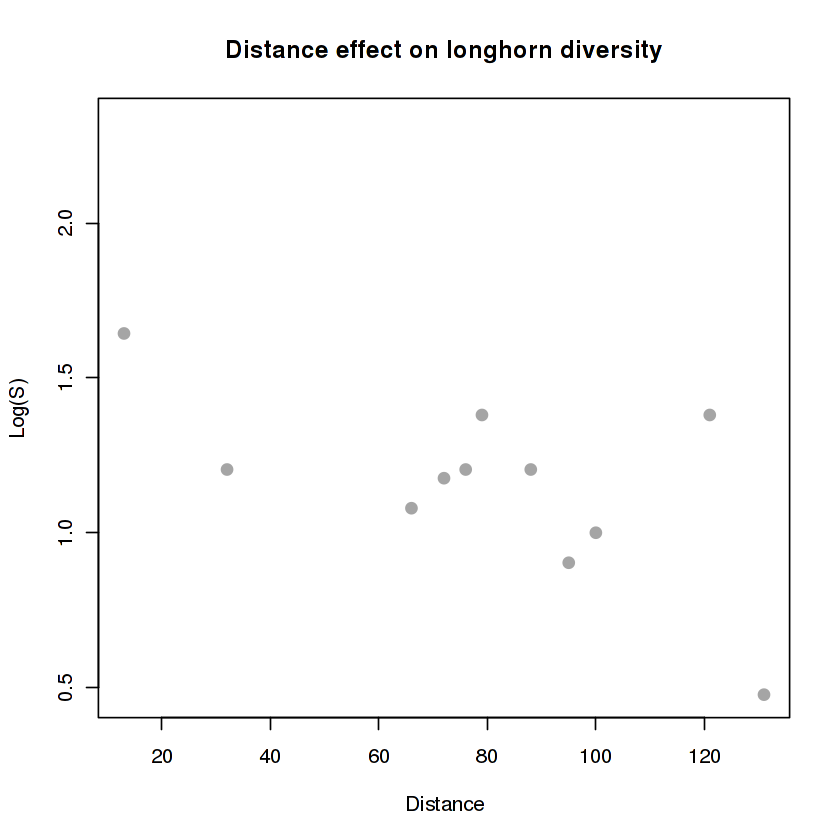

In [6]:
plot(data$LogS ~ data$Distance, main='Distance effect on longhorn diversity', xlab='Distance', ylab='Log(S)', col=alpha('gray30', 0.5), pch=16, cex=1.3)


See a trend? Try to do a mental interpolation, that is, imagine the line through these points that will minimize the sum of squared distances (residual errors) to each of these points. What's the slope of that line? What's the y-intercept?

Let's see what R has to say about it.

In [8]:
model2 <- lm(data$LogS ~ data$Distance)
summary(model2)


Call:
lm(formula = data$LogS ~ data$Distance)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38788 -0.15275 -0.01473  0.11423  0.45999 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.588435   0.190742   8.328  1.6e-05 ***
data$Distance -0.005522   0.002218  -2.489   0.0345 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2434 on 9 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.4078,	Adjusted R-squared:  0.342 
F-statistic: 6.197 on 1 and 9 DF,  p-value: 0.03446


Is that close to what you expected? Let's plot it.

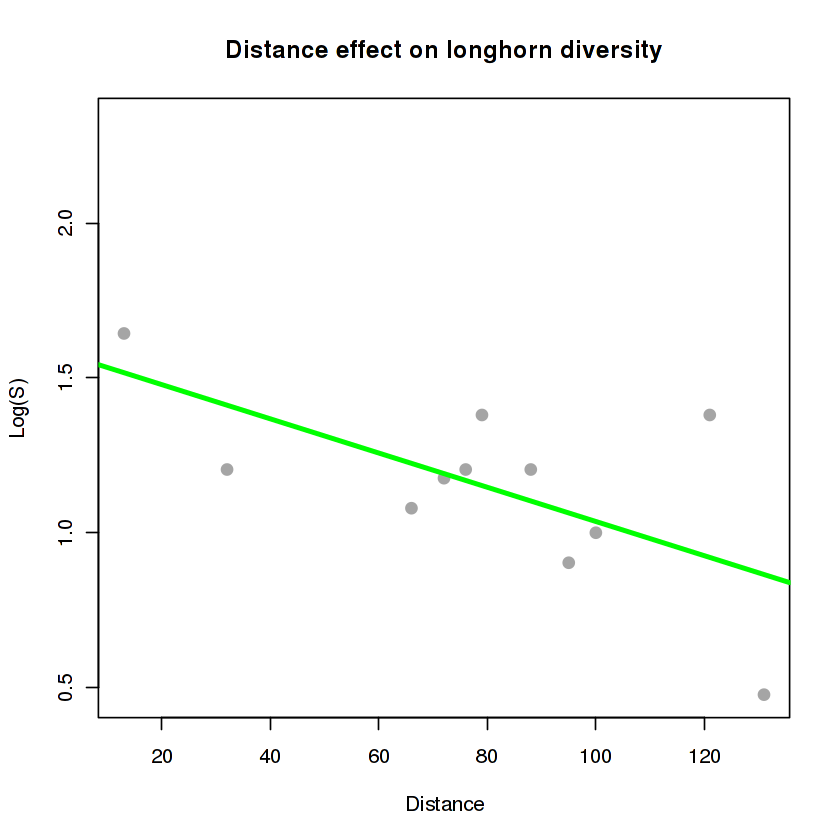

In [9]:
plot(data$LogS ~ data$Distance, main='Distance effect on longhorn diversity', xlab='Distance', ylab='Log(S)', col=alpha('gray30', 0.5), pch=16, cex=1.3)
abline(model2, col='green', lwd=3)

# Part 2. Explaining variation in the SAR

The SAR is fundamental. Bigger areas are more species rich. But area isn't everything. Let's see that for ourselves by playing around some with a published meta-analysis of SAR slope estimates. First we'll load some data. This is a big pile of data and will be ugly to look at...

In [7]:
meta <- read.csv(text='study,hab,z,meth,group,mass,lat,area
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,1.86,ind,birds,150,39,1.2
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.25,nes,plants,10,53,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.09,nes,plants,10,53,2.6
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.12,nes,plants,10,53,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.11,nes,plants,10,53,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.11,nes,plants,10,53.5,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.11,nes,plants,10,54.3,4
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.1,nes,plants,10,52,2.6
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.15,nes,plants,10,51.8,4
"Assmann T. (1999). The ground beetle fauna of ancient and recent woodlands in the lowlands of north-west Germany (Coleoptera, Carabidae). Biodivers. Conserv., 8, 1499-1517",ter,-0.17,ind,insects,0.45,52.2,1.79
"Beaver R.A. (1979). Host specificity of temperate and trophical animals. Nature, 281, 139-141",ter,-0.93,ind,insects,0.005,25.3,0.62
"Bengtson S.A. & Bloch D. (1983). Island land bird population densities in relation to island size and habitat quality on the Faroe Islands Denmark. Oikos, 41, 507-522",ter,0.28,ind,birds,150,62,3.53
"Bengtson S.A. (1980). Species assemblages and coexistence of Faroe Island Denmark ground beetles Coleoptera Carabidae. Entomologia Generalis, 6, 251-266",ter,0.25,ind,insects,0.45,62,2.14
"Billings W.D. (1938). The structure and development of old field shortleaf pine stands and certain associated physical properties of the soil. Ecol. Monogr., 8, 437-500",ter,0.23,nes,plants,10,36,0.6
"Billings W.D. (1938). The structure and development of old field shortleaf pine stands and certain associated physical properties of the soil. Ecol. Monogr., 8, 437-500",ter,0.2,nes,plants,2000,36,1.2
"Billings W.D. (1938). The structure and development of old field shortleaf pine stands and certain associated physical properties of the soil. Ecol. Monogr., 8, 437-500",ter,0.36,nes,plants,44000,36,2
"Blake J.G. (1986). Species-area relationship of migrants in isolated woodlots in east-central Illinois. Wilson Bull., 98, 291-296",ter,0.06,ind,birds,150,40,2.52
"Bond W.J., Midgley J. & Vlok J. (1988). When is an island not an island? Insular effects and their causes in fynbos shrublands. Oecologia, 77, 515-521",ter,0.42,ind,plants,10,-33.9,3.13
"Bowers M.A. (1982). Insular biogeography of mammals in the Great Salt Lake. Great Basin Nat., 42, 589-596",ter,0.17,ind,mammals,800,41,5.55
"Brashares J.S., Arcese P. & Sam M.K. (2001). Human demography and reserve size predict wildlife extinction in West Africa. Proc. R. Soc. Lond. Ser. B., 268, 2473-2478",ter,0.07,ind,mammals,200000,7.5,1.92
"Brashares J.S., Arcese P. & Sam M.K. (2001). Human demography and reserve size predict wildlife extinction in West Africa. Proc. R. Soc. Lond. Ser. B., 268, 2473-2478",ter,0.29,ind,mammals,200000,7.5,1.92
"Brooks T.M., Pimm S.L., Kapos V. & Ravilious C. (1999). Threat from deforestation to montane and lowland birds and mammals in insular South-east Asia. J. Anim. Ecol., 68, 1061-1078",ter,0.42,ind,birds,150,-15,2.32
"Brooks T.M., Pimm S.L., Kapos V. & Ravilious C. (1999). Threat from deforestation to montane and lowland birds and mammals in insular South-east Asia. J. Anim. Ecol., 68, 1061-1078",ter,0.67,ind,mammals,730,-15,2.32
"Brown M. & Dinsmore J.J. (1988). Habitat islands and the equilibrium theory of island biogeography testing some predictions. Oecologia, 75, 426-429",ter,0.23,ind,birds,150,43,2.96
"Browne D.J., Peck S.B. & Ivie M.A. (1993). The longhorn beetles (Coleoptera Cerambycidae) of the Bahama Islands with an analysis of species-area relationships, distribution patterns, origin of the fauna and an annotated species list. Tropical Zoology, 6, 27-53",ter,0.09,ind,insects,0.45,24.5,2.41
"Brunet A.K. & Medellin R.A. (2001). The species-area relationship in bat assemblages of tropical caves. Journal of Mammalogy, 82, 1114-1122",ter,0.31,ind,mammals,13,20.1,2.22
"Capogrego J.V. (1989). Woodlot carabid diversity (Coleoptera Carabidae) utilization of island biogeographic theory for agricultural lands. Melsheimer Entomological Series, 1-8",ter,0.14,ind,insects,0.45,40.9,4.7
"Capogrego J.V. (1989). Woodlot carabid diversity (Coleoptera Carabidae) utilization of island biogeographic theory for agricultural lands. Melsheimer Entomological Series, 1-8",ter,0.04,ind,insects,0.45,40.9,4.7
"Cardillo M. (2002). Body size and latitudinal gradients in regional diversity of New World birds. Global Ecol. Biogeogr., 11, 59-65",ter,1.6,ind,birds,150,31,0.13
"Carter Lovejoy S.H. (1982). The relation between species numbers and island characteristics for habitat islands in a volcanic landscape. Great Basin Nat., 42, 113-119",ter,0.1,ind,plants,10,43.5,1.35
"Carter Lovejoy S.H. (1982). The relation between species numbers and island characteristics for habitat islands in a volcanic landscape. Great Basin Nat., 42, 113-119",ter,0.15,ind,mammals,730,43.5,1.35
"Casas A.G. (1992). Amphibians and reptiles of the Tres Marias Islands and other islands near the coast of Nayarit, Mexico, and some issues on biogeography and conservation. Anales del Instituto de Biologia Universidad Nacional Autonoma de Mexico Serie Zoologia, 63, 95-112",ter,0.21,ind,vertebrates,330,21,2.31
"Chaloupka M.Y. & Domm S.B. (1986). Role of anthropochory in the invasion of coral cays by alien flora. Ecology, 67, 1536-1547",ter,0.18,ind,plants,10,-24,1.72
"Coleman B.D., Mares M.A., Willig M.R. & Hsieh Y.-H. (1982). Randomness, area, and species richness. Ecology, 63, 1121-1133",ter,0.54,ind,birds,150,41.5,2.89
"Abbott I. (1973) Birds of Bass Strait. Proc. R. Soc Victoria 85, 197-223.",ter,0.39,ind,birds,100,-40,5
"Abbott I. (1974) Numbers of plant, insect, and land bird species on nineteen remote islands in the Southern Hemisphere. Biol. J. Linn. Soc. 6, 143-152.",ter,0.22,ind,plants,10,49,5
"Abbott I. (1974) Numbers of plant, insect, and land bird species on nineteen remote islands in the Southern Hemisphere. Biol. J. Linn. Soc. 6, 143-152.",ter,0.22,ind,insects,0.0019,49,5
"Abbott I. (1974) Numbers of plant, insect, and land bird species on nineteen remote islands in the Southern Hemisphere. Biol. J. Linn. Soc. 6, 143-152.",ter,0.03,ind,birds,100,49,5
"Amerson A.B. (1971) The natural history of French Frigate Schoals, northwestern Hawaiian Islands. Atoll Res. Bull. 150",ter,0.39,ind,plants,10,23.5,2
"Amerson A.B. (1971) The natural history of French Frigate Schoals, northwestern Hawaiian Islands. Atoll Res. Bull. 150",ter,0.3,ind,birds,450,23.5,2
"Amerson A.B. (1975) Species richness on the nondisturbed northwestern Hawaiian Islands. Ecology 56, 435-444",ter,0.78,,birds,450,27.5,1
"Amerson A.B. (1975) Species richness on the nondisturbed northwestern Hawaiian Islands. Ecology 56, 435-444",ter,0.66,,plants,10,27.5,1
"Baroni-Urbani C. (1971) Studien zur Ameisenfauns Italiens. XI. Die Ameisen des Taskanischen Archipels. Betrachtungen zer Herkunft dur Inselfaunen. Rev. Suisse Zool. 78, 1037-1067.",ter,0.31,ind,plants,10,42.8,4
"Baroni-Urbani C. (1971) Studien zur Ameisenfauns Italiens. XI. Die Ameisen des Taskanischen Archipels. Betrachtungen zer Herkunft dur Inselfaunen. Rev. Suisse Zool. 78, 1037-1067.",ter,0.27,ind,insects,0.071,42.8,4
"Baroni-Urbani C. (1971) Studien zur Ameisenfauns Italiens. XI. Die Ameisen des Taskanischen Archipels. Betrachtungen zer Herkunft dur Inselfaunen. Rev. Suisse Zool. 78, 1037-1067.",ter,0.19,ind,insects,0.004,42.8,4
"Beard J.S. (1949) The natural vegetation of the windward and leeward islands. Clarendon, Oxford.",ter,0.16,ind,plants,10,15,2
"Brown J.H. (1971) Mammals on mountaintops: nonequilibrium insular biogeography. Am. Nat. 105, 467-478.",ter,0.43,ind,mammals,730,38.5,2
"Carlqvist S. (1974) Island biology. Columbia University Press, New York.",ter,1.13,ind,insects,0.005,20.6,2
"Carlqvist S. (1974) Island biology. Columbia University Press, New York.",ter,0.58,ind,plants,10,20.6,2
"Carrick R. & Ingham S.E. (1970) Ecology and population dynamics of Antarctic seabirds. In: Antarictic ecology (ed. Holdgate M.W.), pp. 505-525. Academivc Press, London.",ter,0.13,ind,birds,450,57.2,2
"Case T. J. (1975) Species numbers, density compensation, and colonizing ability of lizards on islands in the Gulf of California. Ecology 56, 3-18.",ter,0.17,ind,reptiles,34,27,3
"Case T. J. (1975) Species numbers, density compensation, and colonizing ability of lizards on islands in the Gulf of California. Ecology 56, 3-18.",ter,0.27,ind,plants,10,27,3
"Cook R.E. (1974) Origin of the highland avifauna of southern Venezuela. Syst. Zool. 23, 257-264.",ter,0.05,ind,birds,150,5.3,3
"Cook R.E. (1974) Origin of the highland avifauna of southern Venezuela. Syst. Zool. 23, 257-264.",ter,0.66,ind,,0.026,37.5,1
"Diamond J.M. (1972) Biogeographic kinetics: estimation of relaxation times for avifaunas of southwest Pacific islands. Proc. Natl. Acad. Sci. 69, 3199-3203.",ter,0.23,ind,birds,150,5,6
"Exell A.W. (1944) Catalogue of the vascular plants of S. Tome (with Principe and Annobon). British Museum (Natural History), London.",ter,0.4,ind,plants,10,1.9,2
"Glassman S.F. (1965) Geographic distribution of the New World palms. Principes 8, 47-49.",ter,0.38,ind,plants,10,21,4
"Greenslade P. J. (1968) Island patterns in the Solomon Islands bird fauna. Evolution 22, 751-761.",ter,0.27,ind,birds,150,8.3,3
"Gressitt J.S. (1965) Biogeography and ecology of land arthropods of Antarctica. In: Biogeography and ecology in Antarctica (eds. van Mieghem J. & Vanoye P.), pp. 431-490. Junk, The Hauge.",ter,0.03,ind,arthropods,0.005,53.6,2
"Gressitt, J.S. (1970) Subantarctic entomology and biogeography. Pac. Inst. Monogr. 23, 295-374.",ter,0.04,ind,insects,0.005,49.3,1
"Hall E.R. & Kelson K.R. (1959) The mammals of North America. Vols. 1-2. Ronald, New York.",ter,0.59,nes,mammals,730,55,2
"Hall E.R. & Kelson K.R. (1959) The mammals of North America. Vols. 1-2. Ronald, New York.",ter,0.06,nes,mammals,730,22.5,2
"Hall E.R. & Kelson K.R. (1959) The mammals of North America. Vols. 1-2. Ronald, New York.",ter,0.55,nes,vertebrates,800,55,2
"Hall E.R. & Kelson K.R. (1959) The mammals of North America. Vols. 1-2. Ronald, New York.",ter,0.2,nes,vertebrates,800,22.5,2
"Hall E.R. & Kelson K.R. (1959) The mammals of North America. Vols. 1-2. Ronald, New York.",ter,0.93,nes,mammals,13,55,2
"Hall E.R. & Kelson K.R. (1959) The mammals of North America. Vols. 1-2. Ronald, New York.",ter,-0.24,nes,mammals,13,22.5,2
"Hamilton T.H. & Armstrong N.E. (1965) Environmental determination of insular variation in bird species abundance in the Gulf of Guinea. Nature 207, 148-151. ",ter,0.5,ind,birds,150,2.1,2
"Harris M.P. (1973) The Galapagos avifauna. Condor 75, 265-278.",ter,0.16,ind,birds,100,1,3
"Harrison J.L. & Hendrickson J.R. (1963) The fauna of the islands of the Straits of Malacca. In: Pacific basin biogeography (ed. Gressitt J.L.), pp. 543-555. Bishop Museum, Honolulu.",ter,0.39,ind,mammals,13,3,3
Heatwole H. (1975) Biogeography of reptiles on some of the islands and cays of eastern Papua-New Guinea. Atoll Res. Bull. 180.,ter,0.14,ind,reptiles,650,10,4
"Hope J. H. (1973) Mammals of the Bass Strait Islands. Proc. R. Soc. Victoria 85, 163-195.",ter,0.25,ind,mammals,730,-40,4
"Hulten E. (1960) Flora of the Aleutian Islands. Cramer, Weinheim.",ter,0.65,ind,plants,10,53,4
"Johnson M.P. & Raven P.H. (1973) Species number and endemism: the galapagos Archipelago revised. Science 179, 893-895.",ter,0.4,ind,plants,10,1,5
"Johnson M.P. & Simberloff D.S. (1974) Environmental determinants of island species numbers in the British Isles. J. Biogeogr. 1, 149-154.",ter,0.21,ind,plants,10,56.2,4
"Johnson M.P., Mason L.G. & Raven P.H. (1968) Ecological parameters and plant species diversity. Am. Nat. 102, 297-306.",ter,0.45,ind,plants,10,32.7,2
"Johnson M.P., Mason L.G. & Raven P.H. (1968) Ecological parameters and plant species diversity. Am. Nat. 102, 297-306.",ter,0.42,ind,plants,10,32.7,2
"Johnson M.P., Mason L.G. & Raven P.H. (1968) Ecological parameters and plant species diversity. Am. Nat. 102, 297-306.",ter,0.16,ind,plants,10,33.1,3
"Koopman K.F. (1958) Land bridges and ecology in bat distribution on islands off the northern coast of South America. Evolution 12, 429-439.",ter,0.52,ind,mammals,13,11.3,1
"Levins R. & Heatwole H. (1963) On the distribution of organisms on islands. Caribb. J. Sci. 3,173-177. ",ter,0.28,ind,vertebrates,330,17.8,6
"Levins R. & Heatwole H. (1963) On the distribution of organisms on islands. Caribb. J. Sci. 3,173-177. ",ter,0.42,ind,plants,5,14,4
"Levins R. & Heatwole H. (1963) On the distribution of organisms on islands. Caribb. J. Sci. 3,173-177. ",ter,0.42,ind,plants,10,14,4
"Levins R. & Heatwole H. (1963) On the distribution of organisms on islands. Caribb. J. Sci. 3,173-177. ",ter,0.26,ind,plants,10,14,2
"Lems C. (1960) Floristic botay of the Canary Islands. Sarracenia 5, 1-94.",ter,0.24,ind,plants,10,28.8,1
Luther H. (1961) Veranderungen in der gefasspflanzen flora der Meeresfelsen von Tvärminne. Acta Bot. Fenn. 62.,ter,0.48,ind,plants,10,59.8,1
"MacArthur R. & Wilson E.O. (1967) An equilibrium theory of insular zoogeography. Evolution 17, 373-387.",ter,0.37,ind,birds,120,6,4
"Niering W.A. (1956) Bioecology of Kapingamarangi Atoll, Caroline Islands: terrestrial aspects. Atoll Res. Bull. 49.
Niering W.A. (1963) Terrestrial ecology of Kapingamarangi Atoll, Caroline Islands. Ecol. Monogr. 33, 131-160.",ter,0.44,ind,plants,10,1,1
"Opler P.A. (1974) Oaks as evolutionary islands for leaf-mining insects. Am. Sci. 62, 67-73.",ter,0.47,ind,insects,0.71,37,2
"Power D.M. (1972) Numbers of bird species on the California Islands. Evolution 26, 451-463.",ter,0.21,ind,birds,120,31,3
"Power D.M. (1972) Numbers of bird species on the California Islands. Evolution 26, 451-463.",ter,0.45,ind,plants,10,31,3
"Preston F.W. (1962) The canonical distribution of commonness and rarity. Ecology 43, 185-215, 410-432.",ter,0.35,ind,birds,150,9.5,2
"Preston F.W. (1962) The canonical distribution of commonness and rarity. Ecology 43, 185-215, 410-432.",ter,0.26,ind,vertebrates,800,45.5,5
Rey unpubl.,ter,0.45,nes,insects,0.45,19,5
Rey unpubl.,ter,0.2,nes,insects,0.45,53.2,3
"Ricklefs R.E. & Cox G.W. (1972) Taxon cycles in the West Indian avifauna. Am. Nat. 106, 195-219.",ter,0.18,ind,birds,120,18.3,4
"Schoener T.W. (1976) The species-area realtion within archipelagos: models and evidence from island land birds. In: Proceedings of the 16th International Ornithological Conference (eds Firth H.J. & Calaby J. H.), pp. 629-642. Australian Academy of Science, Canberra.",ter,0.32,ind,birds,120,3,6
"Schoener T.W. (1976) The species-area realtion within archipelagos: models and evidence from island land birds. In: Proceedings of the 16th International Ornithological Conference (eds Firth H.J. & Calaby J. H.), pp. 629-642. Australian Academy of Science, Canberra.",ter,0.32,ind,birds,150,60.3,4
"Seidenfaden G. & Sorensen T. (1937) A summary of the vascular plants found in eastern Greenland. Medd. Gronl. 101, 141-215.",ter,-0.28,nes,plants,10,69.8,1
"Simberloff D.S. (1970) Taxonomic diversity of island biotas. Evolution 24, 23-47.",ter,0.12,ind,birds,150,28.8,1
"Simberloff D.S. (1970) Taxonomic diversity of island biotas. Evolution 24, 23-47.",ter,0.31,ind,birds,150,59.1,6
"Simberloff D.S. (1970) Taxonomic diversity of island biotas. Evolution 24, 23-47.",ter,0.24,ind,birds,150,54.3,2
"Strong D.R. (1974) Nonasymptotic species richness models and the insects of British trees. Proc. Natl. Acad. Sci. USA 71, 2766-2769.",ter,1.12,ind,insects,0.005,54.3,2
"Strong D.R. (1974) Rapid asymptotic species accumulation in phytophagous insect communities: the pests of cacao. Science 185, 1064-1066.",ter,0.37,ind,insects,0.005,10,3
"Strong D.R., McCoy E.D. & Rey J.R. (1977) Time and the number of herbivore species: the pest of sugar cane. Ecology 58, 167-175.",ter,0.37,ind,insects,0.005,19,6
"Terborgh J. (1973) Change, habitat and dispersal in the distribution of birds in the West Indies. Evolution 27, 338-349.",ter,0.19,ind,birds,120,17.5,3
"Vuilleumier F. (1970) Insular biogeography in continental regions. I. The northern Andes of South America. Am. Nat. 104, 373-388.",ter,0.3,ind,birds,120,5.8,2
Watson G. (1964) Ecology and evolution of passerine birds on the islands of the Aegan Sea. Vols 1-2. Ph.D. diss. Yale University.,ter,0.35,,birds,120,39.5,4
"Weissman D.B. & Rentz D.E. (1976) Zoogeography of the grasshoppers and their relatives (Orthoptera) on the California Channel Islands. J. Biogeogr. 3, 105-114.",ter,0.28,ind,insects,0.071,33.5,2
"Wilson E.O. & Taylor R.W. (1967) An estimate of the potential evolutionary increase in species density in the Polynesian ant fauna. Evolution 21, 1-10.",ter,0.16,ind,insects,0.004,12,4
"Wilson E.O. (1961) The nature of the taxon cycle in the Melanesian ant fauna. Am. Nat. 95, 169-193.",ter,0.24,,insects,0.004,12,4
"Connor E.F. & Simberloff D. (1978). Species number and compositional similarity of the Galapagos flora and avifauna. Ecol. Monogr., 48, 219-248",ter,-0.002,ind,birds,150,0,5.67
"Connor E.F. & Simberloff D. (1978). Species number and compositional similarity of the Galapagos flora and avifauna. Ecol. Monogr., 48, 219-248",ter,-0.07,ind,plants,10,0,5.67
"Crowell K.L. (1986). A comparison of relict vs. equilibrium models for insular mammals of the Gulf of Maine USA. Biol. J. Linn. Soc., 28, 37-64",ter,0.35,ind,mammals,800,43,1.44
"Crowell K.L. (1986). A comparison of relict vs. equilibrium models for insular mammals of the Gulf of Maine USA. Biol. J. Linn. Soc., 28, 37-64",ter,0.17,ind,mammals,800,43,3.02
"Davis B.N.K. & Jones P.E. (1986). Insects on isolated colonies of common rock-rose Helianthemum-Chamaecistus. Ecol. Entomol, 11, 267-282",ter,0.15,ind,insects,0.004,52.5,4.21
"Davis B.N.K. & Jones P.E. (1986). Insects on isolated colonies of common rock-rose Helianthemum-Chamaecistus. Ecol. Entomol, 11, 267-282",ter,0.14,ind,insects,0.005,52.5,4.21
"Davis B.N.K. & Jones P.E. (1986). Insects on isolated colonies of common rock-rose Helianthemum-Chamaecistus. Ecol. Entomol, 11, 267-282",ter,0.16,ind,insects,0.071,52.5,4.21
"Dressler R.L. (1981). The Orchids: Natural History and Classification. Harvard University Press, Cambridge, MA.",ter,0.18,ind,plants,5,3,1.59
"Dueser R.D. & Brown W.C. (1980). Ecological correlates of insular rodent diversity. Ecology, 61, 50-56",ter,0.38,ind,mammals,49,18,1.88
"Dunn C.P. & Loehle C. (1988). Species-area parameter estimation: Testing the null model of lack of relationship. J. Biogeogr., 15, 721-728",ter,-0.05,ind,plants,10,43,0.88
"Dunn C.P. & Loehle C. (1988). Species-area parameter estimation: Testing the null model of lack of relationship. J. Biogeogr., 15, 721-728",ter,-0.01,ind,plants,10,43,3.12
"Fattorini S. (2002). Biogeography of the tenebrionid beetles (Coleoptera, Tenebrionidae) on the Aegean Islands (Greece). J. Biogeogr., 29, 49-67",ter,0.25,ind,insects,0.005,32.9,3.34
"Geldenhuys C.J. (1997). Composition and biogeography of forest patches on the inland mountains of the southern Cape. Bothalia, 27, 57-74",ter,0.27,ind,plants,10,-34,1.88
"Geldenhuys C.J. (1997). Composition and biogeography of forest patches on the inland mountains of the southern Cape. Bothalia, 27, 57-74",ter,0.31,ind,plants,44000,-34,1.88
"Geldenhuys C.J. (1997). Composition and biogeography of forest patches on the inland mountains of the southern Cape. Bothalia, 27, 57-74",ter,0.11,ind,plants,10,-34,1.88
"Geldenhuys C.J. (1997). Composition and biogeography of forest patches on the inland mountains of the southern Cape. Bothalia, 27, 57-74",ter,0.48,ind,plants,22000,-34,1.88
"Geldenhuys C.J. (1997). Composition and biogeography of forest patches on the inland mountains of the southern Cape. Bothalia, 27, 57-74",ter,0.19,ind,plants,10,-34,1.88
"Gotelli N.J. & Ellison A.M. (2002). Biogeography at a regional scale: Determinants of ant species density in New England bogs and forests. Ecology, 83, 1604-1609",ter,-0.04,ind,insects,0.004,43.5,3.54
"Haila Y. (1981). Winter bird communities in the Åland southwestern Finland archipelago an island bio geographic point of view. Holarctic Ecology, 4, 174-183",ter,0.34,ind,birds,150,60,5.29
"Harris L.D. & Wallace R.D. (1984). Breeding bird species in Florida forest fragments. Proceedings of the Annual Conference Southeastern Association of Fish and Wildlife Agencies, 38, 87-96",ter,0.26,ind,birds,150,30,1.88
"Hattori T. & Ishida H. (2000). Relationship between species diversity, species composition and forest area of fragmented lucidophyllous forests in central Miyazaki Prefecture. Japanese J. of Ecol. Otsu, 50, 221-234",ter,0.2,ind,plants,44000,32,3.42
"He F.L. & Legendre P. (1996). On species-area relations. Am. Nat., 148, 719-737",ter,0.52,ind,plants,44000,2,4.82
"Heaney L.R. (1984). Mammalian species richness on islands on the Sunda shelf southeast Asia. Oecologia, 61, 11-17",ter,0.15,ind,mammals,800,-7,6.79
"Helzer C.J. & Jelinski D.E. (1999). The relative importance of patch area and perimeter-area ratio to grassland breeding birds. Ecol. Appl., 9, 1448-1458",ter,0.35,ind,birds,150,41,2.65
"Herkert J.R. (1994). The effects of habitat fragmentation on midwestern grassland bird communities. Ecol. Appl., 4, 461-471",ter,0.29,ind,birds,150,42,2.81
"Hochstrasser T., Kroel-Dulay G., Peters D.P.C. & Gosz J.R. (2002). Vegetation and climate characteristics of and and semi-arid grasslands in North America and their biome transition zone. J. Arid. Environ., 51, 55-78",ter,0.25,nes,plants,10,32.5,2.37
"Hochstrasser T., Kroel-Dulay G., Peters D.P.C. & Gosz J.R. (2002). Vegetation and climate characteristics of and and semi-arid grasslands in North America and their biome transition zone. J. Arid. Environ., 51, 55-78",ter,0.26,nes,plants,10,40.8,2.37
"Hochstrasser T., Kroel-Dulay G., Peters D.P.C. & Gosz J.R. (2002). Vegetation and climate characteristics of and and semi-arid grasslands in North America and their biome transition zone. J. Arid. Environ., 51, 55-78",ter,0.43,nes,plants,10,34.5,2.36
"Hochstrasser T., Kroel-Dulay G., Peters D.P.C. & Gosz J.R. (2002). Vegetation and climate characteristics of and and semi-arid grasslands in North America and their biome transition zone. J. Arid. Environ., 51, 55-78",ter,0.31,nes,plants,10,32.5,2.97
"Hochstrasser T., Kroel-Dulay G., Peters D.P.C. & Gosz J.R. (2002). Vegetation and climate characteristics of and and semi-arid grasslands in North America and their biome transition zone. J. Arid. Environ., 51, 55-78",ter,0.27,nes,plants,10,40.8,2.97
"Hochstrasser T., Kroel-Dulay G., Peters D.P.C. & Gosz J.R. (2002). Vegetation and climate characteristics of and and semi-arid grasslands in North America and their biome transition zone. J. Arid. Environ., 51, 55-78",ter,0.41,nes,plants,10,34.5,2.97
"Hogg E.H., Morton J.K. & Venn J.M. (1989). Biogeography of islands floras in the Great Lakes Canada I. Species richness and composition in relation to gull nesting activities. Can. J. Bot., 67, 961-969",ter,0.45,ind,plants,10,45.5,2.29
"Hogg E.H., Morton J.K. & Venn J.M. (1989). Biogeography of islands floras in the Great Lakes Canada I. Species richness and composition in relation to gull nesting activities. Can. J. Bot., 67, 961-969",ter,0.26,ind ,plants,10,45.5,4.09
"Ishida H., Hattori T., Takeda Y. & Kodate S. (1998). Relationship between species richness or species composition and area of fragmented lucidophyllous forests in southeastern Hyogo Prefecture. Japanese Journal of Ecology Tokyo, 48, 1-16",ter,0.23,ind,plants,44000,35,2.82
"Johnson D.W. (1986). Desert buttes natural experiments for testing theories of island biogeography. National Geographic Research, 2, 152-166",ter,0.02,ind,insects,0.004,37,1.92
"Johnson D.W. (1986). Desert buttes natural experiments for testing theories of island biogeography. National Geographic Research, 2, 152-166",ter,0.14,ind,reptiles,650,37,1.92
"Johnson D.W. (1986). Desert buttes natural experiments for testing theories of island biogeography. National Geographic Research, 2, 152-166",ter,0.11,ind,mammals,730,37,1.92
"Kassas M. & Imam M. (1959). Habitat and plant communities in the Egyptian desert: IV. The gravel desert. J. Ecol., 47, 289-310",ter,0.3,nes,plants,10,30,1.15
"Kassas M. & Imam M. (1959). Habitat and plant communities in the Egyptian desert: IV. The gravel desert. J. Ecol., 47, 289-310",ter,0.41,nes,plants,10,30,1.15
"Kassas M. & Imam M. (1959). Habitat and plant communities in the Egyptian desert: IV. The gravel desert. J. Ecol., 47, 289-310",ter,0.59,nes,plants,10,30,2.12
"Kelly B.J., Wilson J.B. & Mark A.F. (1989). Causes of the species-area relation: A study of islands in Lake Manapouri, New Zealand. J. Ecology 77, 1021-1028",ter,0.05,ind,plants,10,-45.5,2.89
"Kelly B.J., Wilson J.B. & Mark A.F. (1989). Causes of the species-area relation: A study of islands in Lake Manapouri, New Zealand. J. Ecology 77, 1021-1028",ter,0.06,ind,plants,10,-45.5,4.05
"Kilburn P.D. (1966). Analysis of the species-area relation. Ecology, 47, 831-843",ter,0.35,nes,plants,10,39,9.95
"Kilburn P.D. (1966). Analysis of the species-area relation. Ecology, 47, 831-843",ter,0.26,nes,plants,10,46.5,9.95
"Kilburn P.D. (1966). Analysis of the species-area relation. Ecology, 47, 831-843",ter,0.29,nes,plants,10,45.5,9.95
"Kilburn P.D. (1966). Analysis of the species-area relation. Ecology, 47, 831-843",ter,0.3,nes,plants,10,46.5,9.95
"Kilburn P.D. (1966). Analysis of the species-area relation. Ecology, 47, 831-843",ter,0.3,nes,plants,10,46.5,9.95
"Kilburn P.D. (1966). Analysis of the species-area relation. Ecology, 47, 831-843",ter,0.32,nes,plants,10,39,9.95
"Knight D.H. (1975). A phytosociological analysis of species-rich tropical forest on Barro Colorado Island, Panama. Ecol. Monogr., 45, 259-284",ter,0.31,nes,plants,44000,9.2,1.26
"Koh L.P., Sodhi N.S., Tan H.T.W. & Peh K.S.H. (2002). Factors affecting the distribution of vascular plants, springtails, butterflies and birds on small tropical islands. J. Biogeogr., 29, 93-108",ter,0.29,ind,insects,0.71,1.3,3.49
"Koh L.P., Sodhi N.S., Tan H.T.W. & Peh K.S.H. (2002). Factors affecting the distribution of vascular plants, springtails, butterflies and birds on small tropical islands. J. Biogeogr., 29, 93-108",ter,0.4,ind,insects,0.005,1.3,3.49
"Koh L.P., Sodhi N.S., Tan H.T.W. & Peh K.S.H. (2002). Factors affecting the distribution of vascular plants, springtails, butterflies and birds on small tropical islands. J. Biogeogr., 29, 93-108",ter,0.13,ind,plants,10,1.3,3.49
"Koh L.P., Sodhi N.S., Tan H.T.W. & Peh K.S.H. (2002). Factors affecting the distribution of vascular plants, springtails, butterflies and birds on small tropical islands. J. Biogeogr., 29, 93-108",ter,0.22,ind,birds,150,1.3,3.49
"Kohn D.D. & Walsh D.M. (1994). Plant species richness-The effect of island size and habitat diversity. J. Ecol., 82, 367-377",ter,0.51,ind,plants,10,60,3.51
"Kratter A.W. (1992). Montane avian biogeography in southern California and Baja- California. J. Biogeogr., 19, 269-283",ter,0.13,ind,birds,150,25,6.03
"Corbet G.B. (1971) Provisional distribution maps of British mammals. Mammal Review 1, 95-142.
Corbet G.B. & Southern H.N. eds (1977) The handbook of British Mammals, 2nd ed. Oxford, Blackewell Scientific Publications.",ter,0.29,ind ,mammals,800,49.5,1.95
"Corbet G.B. (1971) Provisional distribution maps of British mammals. Mammal Review 1, 95-142.
Corbet G.B. & Southern H.N. eds (1977) The handbook of British Mammals, 2nd ed. Oxford, Blackewell Scientific Publications.",ter,0.33,ind ,mammals,800,8,2.05
"Burbridge A.A. & McKenzie N.L. (1978) The islands of the north-west Kimberley, Western Australia. Wildlife Research Bulletin Western Australia 7, 1-47.",ter,0.37,ind ,mammals,800,-15,1.57
"Lawlor T.E. (1983) The mammals. In: Island Biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), pp. 265-289, 482-500. University of California Press, Berkeley.",ter,0.28,ind ,mammals,800,25,3.48
"Lawlor T.E. (1983) The mammals. In: Island Biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), pp. 265-289, 482-500. University of California Press, Berkeley.",ter,0.1,ind ,mammals,800,25,3.35
"Hope J. H. (1973) Mammals of the Bass Strait Islands. Proceedings of the Royal Society of Victoria 85, 163-195.",ter,0.33,ind ,mammals,800,-40,4.53
"Hope J. H. (1973) Mammals of the Bass Strait Islands. Proceedings of the Royal Society of Victoria 85, 163-195.",ter,0.25,ind ,mammals,800,-7,4.97
"von Bloecker Jr J.C. (1967) The land mammals of the southern California Islands. In: Proceedings of a Symposium on the Biology of the California Islands (ed Philbrick R.N.), pp. 245-263. Santa Barbara Botanical Garden, California.",ter,0.17,ind ,mammals,800,34,3.7
"von Bloecker Jr J.C. (1967) The land mammals of the southern California Islands. In: Proceedings of a Symposium on the Biology of the California Islands (ed Philbrick R.N.), pp. 245-263. Santa Barbara Botanical Garden, California.",ter,0.17,ind ,mammals,800,-5,3.54
"Lawlor T.E. (1998). Biogeography of great mammals: Paradigm lost? Journal of Mammalogy, 79, 1111-1130",ter,0.13,ind ,mammals,730,40,1.38
"Lawson G.W., Armstrong-Mensah K.O. & Hall J.B. (1970). A catena in tropical moist semi-deciduous forest near Kade, Ghana. J. Ecol., 58, 371-398",ter,0.3,nes,plants,44000,6.2,2.22
"Lawson G.W., Armstrong-Mensah K.O. & Hall J.B. (1970). A catena in tropical moist semi-deciduous forest near Kade, Ghana. J. Ecol., 58, 371-398",ter,0.48,nes,plants,10,6.2,2.52
"Levenson J.B. (1981). Woodlots as biogeographic islands in southeastern Wisconsin. In: Ecol. Stud. (eds. Burgess RL & Sharpe DM), pp. 13-39",ter,0.02,ind,plants,22000,43,3.12
"Lomolino M.V. & Perault D.R. (2001). Island biogeography and landscape ecology of mammals inhabiting fragmented, temperate rain forests. Global Ecol. and Biogeogr., 10, 113-132",ter,0.15,ind,mammals,800,47.7,1.8
"Lomolino M.V. (1982). Species area and species distance relationships of terrestrial mammals in the thousand island region St-Lawrence River USA Canada. Oecologia, 54, 72-75",ter,0.23,ind,mammals,730,45,4.17
"Lomolino M.V., Brown J.H. & Davis R. (1989). Island biogeograhy of montane forest mammals in the American southwest. Ecology, 70, 180-194",ter,0.39,ind,mammals,730,35.2,3.21
"Ma M., Tarmi S. & Helenius J. (2002). Revisiting the species-area relationship in a semi-natural habitat: Floral richness in agricultural buffer zones in Finland. Agric. Ecosyst. Environ., 89, 137-148",ter,0.12,ind,plants,10,60.4,1.95
"Magura T., Kodobocz V. & Tothmeresz B. (2001). Effects of habitat fragmentation on carabids in forest patches. J. Biogeogr., 28, 129-138",ter,-0.1,ind,insects,0.45,49,1.99
"Martin T.E. (1988). Habitat and area effects on forest bird assemblages: Is nest predation an influence? Ecology, 69, 74-84",ter,0.73,ind,birds,150,34,0.72
"Martin T.E. (1988). Habitat and area effects on forest bird assemblages: Is nest predation an influence? Ecology, 69, 74-84",ter,0.67,ind,birds,150,34,0.93
"Mason C.F. (2001). Woodland area, species turnover and the conservation of bird assemblages in lowland England. Biodivers. Conserv., 10, 495-510",ter,0.28,ind,birds,150,51.8,2.76
"Medail F. & Vidal E. (1998). Organization of species richness and composition of the flora in the western Mediterranean Islands (Southeastern France). Can. J. Bot., 76, 321-331",ter,0.49,ind,plants,10,44,4.1
"Miller S.E. (1984). Butterflies of the California Channel Islands USA. Journal of Research on the Lepidoptera, 23, 282-296",ter,0.17,ind,insects,0.71,34,1.98
"Miller S.E. (1984). Butterflies of the California Channel Islands USA. Journal of Research on the Lepidoptera, 23, 282-296",ter,0.21,ind,insects,0.071,34,1.98
"Miyashita T., Shinkai A. & Chida T. (1998). The effects of forest fragmentation on web spider communities in urban areas. Biol. Conserv., 86, 357-364",ter,0.24,ind,arthropods,0.005,35.7,2.13
"Miyashita T., Shinkai A. & Chida T. (1998). The effects of forest fragmentation on web spider communities in urban areas. Biol. Conserv., 86, 357-364",ter,0.09,ind,arthropods,0.005,35.4,4.1
"Moody A. (2000). Analysis of plant species diversity with respect to island characteristics on the Channel Islands, California. J. Biogeogr., 27, 711-723",ter,0.24,ind,plants,10,34,2.05
"Morimoto K. & Miyakawa S. (1985). Weevil fauna of the Izu Islands Japan. Mushi, 50, 19-85",ter,0.3,ind,insects,0.071,32,1.38
"Morrison L.W. (1997). The insular biogeography of small Bahamian cays. J. Ecol., 85, 441-454",ter,0.43,ind,plants,10,25,2.6
"Morrison L.W. (1997). The insular biogeography of small Bahamian cays. J. Ecol., 85, 441-454",ter,0.41,ind,plants,10,23,2.43
"Mulugeta D., Stoltenberg D.E. & Boerboom C.M. (2001). Weed species-area relationships as influenced by tillage. Weed Sci., 49, 217-223",ter,0.18,nes,plants,10,43.5,3.91
"Mulugeta D., Stoltenberg D.E. & Boerboom C.M. (2001). Weed species-area relationships as influenced by tillage. Weed Sci., 49, 217-223",ter,0.17,nes,plants,10,43.5,3.91
"Natuhara Y. & Imai C. (1999). Prediction of species richness of breeding birds by landscape-level factors of urban woods in Osaka Prefecture, Japan. Biodivers. Conserv., 8, 239-253",ter,0.21,ind,birds,150,35.1,6.03
"Newmark W.D. (1986). Species-area relationship and its determinants for mammals in western North American national parks. Biol. J. Linn. Soc., 28, 83-98",ter,0.12,ind,mammals,730,43.9,2.4
"Bellamy P.E., Hinsley S.A. & Newton I. (1996) Factors influencing bird species numbers in woodland fragments in south-east England. J. Appl. Ecol. 33, 249-262.
Hinsley S.A., Bellamy P.E. Newton I. (1995) Bird species turnover and stochastic extinction in woodland fragments. Ecography 18, 41-50.",ter,0.34,ind,birds,150,52.5,3.19
"Nieminen M. & Hanski I. (1998). Metapopulations of moths on islands: A test of two contrasting models. J. Anim. Ecol., 67, 149-160",ter,0.37,ind,insects,0.071,60,1.3
"Nieminen M. & Hanski I. (1998). Metapopulations of moths on islands: A test of two contrasting models. J. Anim. Ecol., 67, 149-160",ter,0.27,ind,insects,0.071,60,1.11
"Nieminen M. & Hanski I. (1998). Metapopulations of moths on islands: A test of two contrasting models. J. Anim. Ecol., 67, 149-160",ter,0.15,ind,plants,10,60,2.14
"Nilsson S.G., Bengtsson J. & Ås S. (1988). Habitat diversity or area per se? Species richness of woody plants, carabid beetles and land snails on islands. J. Anim. Ecol., 57, 685-704",ter,0.1,ind,plants,44000,59.5,2.09
"Nilsson S.G., Bengtsson J. & Ås S. (1988). Habitat diversity or area per se? Species richness of woody plants, carabid beetles and land snails on islands. J. Anim. Ecol., 57, 685-704",ter,0.15,ind,molluscs,0.025,59.5,2.09
"Nilsson S.G., Bengtsson J. & Ås S. (1988). Habitat diversity or area per se? Species richness of woody plants, carabid beetles and land snails on islands. J. Anim. Ecol., 57, 685-704",ter,0.37,ind,insects,0.45,59.5,2.09
"Nores M. (1995). Insular biogeography of birds on mountain-tops in north-western Argentina. J. Biogeogr., 22, 61-70",ter,0.36,,birds,150,-30,2.44
"Panitsa M. & Tzanoudakis D. (2001). A floristic investigation of the islet groups Arki and Lipsi (East Aegean area, Greece). Folia Geobotanica, 36, 265-279",ter,0.31,ind,plants,10,37.4,7.13
"Pannach G. (1987). Colonization of birds on cemeteries in Brunswick (Lower Saxony). Braunschw. Naturkd. Schr., 2, 751-757",ter,0.23,ind,birds,150,52.2,0.65
"Parthasarathy N. & Karthikeyan R. (1997). Biodiversity and population density of woody species in a tropical evergreen forest in Courtallum reserve forest, Western Ghats, India. Tropical Ecology, 38, 297-306",ter,0.51,nes,plants,22000,8.9,2
"Parthasarathy N. (1999). Tree diversity and distribution in undisturbed and human-impacted sites of tropical wet evergreen forest in southern Western Ghats, India. Biodivers. Conserv., 8, 1365-1381",ter,0.5,nes,plants,44000,8.5,1
"Parthasarathy N. (1999). Tree diversity and distribution in undisturbed and human-impacted sites of tropical wet evergreen forest in southern Western Ghats, India. Biodivers. Conserv., 8, 1365-1381",ter,0.38,nes,plants,44000,8.5,1
"Parthasarathy N. (1999). Tree diversity and distribution in undisturbed and human-impacted sites of tropical wet evergreen forest in southern Western Ghats, India. Biodivers. Conserv., 8, 1365-1381",ter,0.46,nes,plants,44000,8.5,1
"Peck S.B. & Howden H.F. (1985). Biogeography of scavenging scarab beetles in the Florida Keys USA post-pleistocene land-bridge islands. Can. J.  Zool., 63, 2730-2737",ter,0.38,ind ,insects,0.45,25,5.33
"Poore M.E.D. (1964). Integration in the plant community. J. Anim. Ecol., 33, 213-226",ter,0.65,nes,plants,44000,2,1.76
"Poore M.E.D. (1964). Integration in the plant community. J. Anim. Ecol., 33, 213-226",ter,0.58,nes,plants,44000,3,6.56
"Proctor J., Anderson J.M., Chai P. & Vallack H.W. (1983). Ecological studies in four contrasting lowland rain forests in Gunung Mulu National Park, Sarawak: I. Forest environment, structure and floristics. J. Ecol., 71, 237-260",ter,0.82,nes,plants,44000,3,1.4
"Proctor J., Anderson J.M., Chai P. & Vallack H.W. (1983). Ecological studies in four contrasting lowland rain forests in Gunung Mulu National Park, Sarawak: I. Forest environment, structure and floristics. J. Ecol., 71, 237-260",ter,0.67,nes,plants,44000,3,1.4
"Proctor J., Anderson J.M., Chai P. & Vallack H.W. (1983). Ecological studies in four contrasting lowland rain forests in Gunung Mulu National Park, Sarawak: I. Forest environment, structure and floristics. J. Ecol., 71, 237-260",ter,0.72,nes,plants,44000,3,1.4
"Proctor J., Anderson J.M., Chai P. & Vallack H.W. (1983). Ecological studies in four contrasting lowland rain forests in Gunung Mulu National Park, Sarawak: I. Forest environment, structure and floristics. J. Ecol., 71, 237-260",ter,0.62,nes,plants,44000,3,1.4
"Proctor J. Lee Y.F., Langley A. M., Munro W.R.C. & Nelson T. (1988) Ecological studies on Gunung Silam, A small ultrabasic mountain in Sabah, malaysia. I. Environment, forest structure and floristics. J. Ecol., 76, 320-340",ter,0.64,ind,plants,10,5,1.06
"Rey J.R. (1981). Ecological biogeography of arthropods on Spartina Islands in Northwest Florida. Ecol. Monogr., 51, 237-265",ter,0.3,ind,arthropods,0.005,30,1.13
"Rice E.L. (1952). Phytosociological analysis of a tall-grass prairie in Marshall County, Oklahoma. Ecology, 33, 112-116",ter,0.4,nes,plants,10,33.6,1.3
"Rice E.L. (1952). Phytosociological analysis of a tall-grass prairie in Marshall County, Oklahoma. Ecology, 33, 112-116",ter,0.43,nes,plants,10,33.6,1.3
"Richards P.W. (1939). Ecological studies on the rain forest of Southern Nigeria: I. The structure and floristic composition of the primary forest. J. Ecol, 27, 1-61",ter,0.4,nes,plants,44000,7,0.57
"Richards P.W. (1939). Ecological studies on the rain forest of Southern Nigeria: I. The structure and floristic composition of the primary forest. J. Ecol, 27, 1-61",ter,0.34,nes,plants,44000,7,0.57
"Richards P.W. (1939). Ecological studies on the rain forest of Southern Nigeria: I. The structure and floristic composition of the primary forest. J. Ecol, 27, 1-61",ter,0.39,nes,plants,44000,7,0.57
"Richards P.W. (1939). Ecological studies on the rain forest of Southern Nigeria: I. The structure and floristic composition of the primary forest. J. Ecol, 27, 1-61",ter,0.52,nes,plants,44000,6.3,0.57
"Richards P.W. (1939). Ecological studies on the rain forest of Southern Nigeria: I. The structure and floristic composition of the primary forest. J. Ecol, 27, 1-61",ter,0.45,nes,plants,44000,7,0.57
"Richards P.W. (1939). Ecological studies on the rain forest of Southern Nigeria: I. The structure and floristic composition of the primary forest. J. Ecol, 27, 1-61",ter,0.64,nes,plants,44000,6.3,0.57
"Ricklefs R.E. & Lovette I.J. (1999). The roles of island area per se and habitat diversity in the species-area relationships of four Lesser Antillean faunal groups. J. Anim. Ecol, 68, 1142-1160",ter,0.23,ind,mammals,13,15,2.07
"Ricklefs R.E. & Lovette I.J. (1999). The roles of island area per se and habitat diversity in the species-area relationships of four Lesser Antillean faunal groups. J. Anim. Ecol, 68, 1142-1160",ter,0.26,ind,insects,0.71,15,2.07
"Ricklefs R.E. & Lovette I.J. (1999). The roles of island area per se and habitat diversity in the species-area relationships of four Lesser Antillean faunal groups. J. Anim. Ecol, 68, 1142-1160",ter,0.21,ind,birds,150,15,2.07
"Ricklefs R.E. & Lovette I.J. (1999). The roles of island area per se and habitat diversity in the species-area relationships of four Lesser Antillean faunal groups. J. Anim. Ecol, 68, 1142-1160",ter,0.16,ind,vertebrates,330,15,2.07
"Rudnicky T.C. & Hunter M.L. (1993). Reversing the fragmentation perspective: Effects of clearcut size on bird species richness in Maine. Ecol. Appl, 3, 357-366",ter,0.34,ind,birds,150,44,1.91
"Selmi S., Boulinier T. & Barbault R. (2002). Richness and composition of oasis bird communities: Spatial issues and species-area relationships. Auk, 119, 533-539",ter,0.04,ind,birds,150,32,1.23
"Selmi S., Boulinier T. & Barbault R. (2002). Richness and composition of oasis bird communities: Spatial issues and species-area relationships. Auk, 119, 533-539",ter,0.12,ind,birds,150,32,1.43
"Selmi S., Boulinier T. & Barbault R. (2002). Richness and composition of oasis bird communities: Spatial issues and species-area relationships. Auk, 119, 533-539",ter,0.07,ind,birds,150,32,1.31
"Semenova G.V. & Onipchenko V.G. (1996). Soil seed bank of an alpine lichen heath in the Northwestern Caucasus: Species richness. Oecologia Montana, 5, 83-86",ter,0.17,nes,plants,10,43.5,1.69
"Semenova G.V. & Onipchenko V.G. (1996). Soil seed bank of an alpine lichen heath in the Northwestern Caucasus: Species richness. Oecologia Montana, 5, 83-86",ter,0.37,nes,plants,10,43.5,1.69
"Sfenthourakis S. (1996). The species-area relationship of terrestrial isopods (Isopoda; Oniscidea) from the Aegean archipelago (Greece): A comparative study. Global Ecol. Biogeogr. Letters, 5, 149-157",ter,0.2,ind,arthropods,0.005,38,4.2
"Sidner R. & Davis R. (1995). Use of species/area equations to estimate potential species richness of bats on inadequately surveyed mountain islands. U S Forest Service General Technical Report RM, 264, 294-300",ter,0.57,ind,mammals,13,34,1.15
"Simberloff D. (1976). Experimental zoogeography of islands: Effects of island size. Ecology, 57, 629-648",ter,0.11,ind,arthropods,0.005,25,1.37
"Soulé M.E., Bolger D.T., Alberts A.C., Wright J., Sorice M. & Hill S. (1988). Reconstructed dynamics of rapid extinctions of chaparral-requiring birds in urban habitat islands. Conserv. Biol, 2, 75-92",ter,0.32,ind,birds,93,33,2.41
"Soulé M.E., Bolger D.T., Alberts A.C., Wright J., Sorice M. & Hill S. (1988). Reconstructed dynamics of rapid extinctions of chaparral-requiring birds in urban habitat islands. Conserv. Biol, 2, 75-92",ter,0.36,ind,birds,93,33,2.41
"Steffan-Dewenter I. & Tscharntke T. (2000). Butterfly community structure in fragmented habitats. Ecol. Lett., 3, 449-456",ter,0.11,ind,insects,0.71,51.5,2.46
"Steffan-Dewenter I. & Tscharntke T. (2000). Butterfly community structure in fragmented habitats. Ecol. Lett., 3, 449-456",ter,0.14,ind,plants,10,51.5,2.41
"Summerville K.S., Veech J.A. & Crist T.O. (2002). Does variation in patch use among butterfly species contribute to nestedness at fine spatial scales? Oikos, 97, 195-204",ter,1.07,ind,insects,0.71,39.5,0.7
"Tanner E.V.J. (1977). Four montane rain forests of Jamaica: A quantitative characterization of the floristics, the soils and the foliar mineral levels, and a discussion of the interrelations. J. Ecol., 65, 883-918",ter,0.27,nes,plants,44000,18,0.96
"Tanner E.V.J. (1977). Four montane rain forests of Jamaica: A quantitative characterization of the floristics, the soils and the foliar mineral levels, and a discussion of the interrelations. J. Ecol., 65, 883-918",ter,0.5,nes,plants,44000,18,1.05
"Tanner E.V.J. (1977). Four montane rain forests of Jamaica: A quantitative characterization of the floristics, the soils and the foliar mineral levels, and a discussion of the interrelations. J. Ecol., 65, 883-918",ter,0.36,nes,plants,44000,18,1.03
"Tanner E.V.J. (1977). Four montane rain forests of Jamaica: A quantitative characterization of the floristics, the soils and the foliar mineral levels, and a discussion of the interrelations. J. Ecol., 65, 883-918",ter,0.52,nes,plants,44000,18,1.08
"Terayama M. & Murata K. (1987). Relation between ant communities and vegetations of Toshima Island the Izu Islands Japan. Bulletin of the Biogeographical Society of Japan, 42, 57-64",ter,0.07,ind,insects,0.004,32,1.36
"Terayama M. (1992). Structure of ant communities in East Asia: I. Regional differences and species richness. Bulletin of the Biogeographical Society of Japan, 47, 1-31",ter,0.52,ind,plants,10,27,2.3
"Terayama M. (1992). Structure of ant communities in East Asia: I. Regional differences and species richness. Bulletin of the Biogeographical Society of Japan, 47, 1-31",ter,0.06,ind,insects,0.004,32,3.46
"Terayama M. (1992). Structure of ant communities in East Asia: I. Regional differences and species richness. Bulletin of the Biogeographical Society of Japan, 47, 1-31",ter,0.27,ind,insects,0.004,27,3.4
"Terayama M. (1992). Structure of ant communities in East Asia: I. Regional differences and species richness. Bulletin of the Biogeographical Society of Japan, 47, 1-31",ter,0.11,ind,insects,0.004,24,4.36
"Terborgh J.W. & Faaborg J. (1980). Saturation of bird communities in the West Indies. Am. Nat., 116, 178-195",ter,0.23,ind,birds,42,64.2,3.18
"van Buskirk J. (1985). Species-area relationship of birds on small islands at Isle Royale, Michigan. Wilson Bull., 97, 566-569",ter,0.24,ind,birds,150,48,4.84
"Vaughan R.E. & Wiehe P.O. (1941). Studies on the vegetation of Mauritius: III. The structure and development of the upland climax forest. J. Ecol., 29, 127-160",ter,0.37,nes,plants,10,-20,2.7
"Vaughan R.E. & Wiehe P.O. (1941). Studies on the vegetation of Mauritius: III. The structure and development of the upland climax forest. J. Ecol., 29, 127-160",ter,0.43,nes,plants,10,-20,2.7
"Vaughan R.E. & Wiehe P.O. (1941). Studies on the vegetation of Mauritius: III. The structure and development of the upland climax forest. J. Ecol., 29, 127-160",ter,0.49,nes,plants,10,-20,2.7
"Watson D.M. & Peterson T. (1999). Determinants of diversity in a naturally fragmented landscape: humid montane forest avifaunas of Mesoamerica. Ecography, 22, 582-589",ter,0.07,ind,birds,150,17.5,3.11
"Wetterer J.K. (2002). Ants of Tonga. Pacific Science, 56, 125-135",ter,0.2,ind,insects,0.004,-19,2.4
"White P.S., Miller R.I. & Ramseur G.S. (1984). The species area relationship of the Southern Appalachian high peaks vascular plant richness and rare plant distributions. Castanea, 49, 47-61",ter,0.12,ind,plants,10,35,3.21
"Abbott I. (1973) Birds of Bass Straight. Proc. R. Soc. Victoria 85, 197-223.",ter,0.34,ind,birds,150,-40,2.65
Cody (pers comm),ter,0.27,ind,birds,150,27,3.2
"Diamond J.M. (1969) Avifaunal equilibria and species turnover rates on the Channel Islands of California. Proc. Natl. Acad. Sci. USA 64, 57-63.",ter,0.2,ind,birds,150,34,1.98
"Dobson R. (1952) The birds of the Channel Islands. Staples, London.",ter,0.19,ind,birds,150,49.5,1.95
"Frazer J.F.D. (1949) The reptiles and amphibia of the Channel Isles and their distribution. Br. J. Herpetol. 1, 51-53.",ter,0.23,ind,amphibians,11,49.5,1.95
"Frazer J.F.D. (1949) The reptiles and amphibia of the Channel Isles and their distribution. Br. J. Herpetol. 1, 51-53.",ter,0.24,ind,reptiles,650,49.5,1.95
"Grant P.R. & Cowan I.M. (1964) A review of the avifauna of the Tres Marias Islands, Nayarit, Mexico. Condor 66, 221-228.",ter,0.27,ind,birds,150,22,1.22
"Hope J.H. (1973) Mammals of the Bass Straight Islands. Proc. R. Soc. Victoria 85, 163-195.",ter,0.38,ind,mammals,800,-40,2.65
"Lawlor T.E. (1983) Biogeography of mammals on islands in the Gulf of California, Mexico. In: Island biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), University of California Press, Berkeley.",ter,0.09,ind,mammals,800,27,3.2
"Lawlor T.E. (1983) Biogeography of mammals on islands in the Gulf of California, Mexico. In: Island biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), University of California Press, Berkeley.",ter,0.21,ind,mammals,800,27,3.48
"Littlejohn M.J. & Martin A.A. (1974) The amphibia of Tasmania. In: Biogeography and ecology in Tasmania. (ed Williams W.D.), pp. 251-289, Junk, The Hauge.",ter,0.3,ind,amphibians,11,-40,2.65
"McDiarmid R.W., Copp J.F. & Breedlove D.E. (1976) Notes on the herpetofauna of western Mexico: new records from Sinaloa and the Tres Marias Islands. Nat. Hist. Mus. L.A. County Contrib. Sci. 275.
Zweifel R.G. (1960) Results of the Puritan-American Museum of Natural History expedition to western Mexico. 9. Herpetology of the Tres Marias Islands. Bull. Am. Mus. Nat. Hist. 119, 77-128.",ter,0.36,ind,reptiles,650,22,1.22
"McDiarmid R.W., Copp J.F. & Breedlove D.E. (1976) Notes on the herpetofauna of western Mexico: new records from Sinaloa and the Tres Marias Islands. Nat. Hist. Mus. L.A. County Contrib. Sci. 275.
Zweifel R.G. (1960) Results of the Puritan-American Museum of Natural History expedition to western Mexico. 9. Herpetology of the Tres Marias Islands. Bull. Am. Mus. Nat. Hist. 119, 77-128.",ter,0.41,ind,amphibians,11,22,1.22
"Murphy R.W. & Ottley J.R. (1983) A checklist of the amphibians and reptiles on the islands in the Sea of Cortez. In: Island biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), University of California Press, Berkeley.",ter,0.03,ind,amphibians,11,27,3.2
"Murphy R.W. & Ottley J.R. (1983) A checklist of the amphibians and reptiles on the islands in the Sea of Cortez. In: Island biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), University of California Press, Berkeley.",ter,0.19,ind,reptiles,650,27,3.2
"Murphy R.W. & Ottley J.R. (1983) A checklist of the amphibians and reptiles on the islands in the Sea of Cortez. In: Island biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), University of California Press, Berkeley.",ter,0.07,ind,amphibians,11,27,3.48
"Murphy R.W. & Ottley J.R. (1983) A checklist of the amphibians and reptiles on the islands in the Sea of Cortez. In: Island biogeography in the Sea of Cortez (eds Case T.J. & Cody M.L.), University of California Press, Berkeley.",ter,0.17,ind,reptiles,650,27,3.48
"Rawlinson P.A. (1974) Biogeography and ecology of the reptiles of Tasmania and the Bass Strait area. In: Biogeography and ecology in Tasmania. (ed Williams W.D.), pp. 291-339, Junk, The Hauge.",ter,0.19,ind,reptiles,650,-40,2.65
"van Rossem, A.J. (1932) The avifauna of Tiburon Island, Sonora, Mexico, with descriptions of four new races. Trans. San Diego Soc. Nat. Hist. 7, 119-150.
+ Cody (pers comm)",ter,0.21,ind,birds,150,27,3.48
"Savage J.M. (1967) Evolution of the insular herpetofaunas (ed Philbrick R.N.) Proc. Symp. Biology Calif. Channel Islands. Santa Barbara Botanic Gardens, Santa Barbara, Calif.",ter,0.17,ind,reptiles,650,34,1.98
"Savage J.M. (1967) Evolution of the insular herpetofaunas (ed Philbrick R.N.) Proc. Symp. Biology Calif. Channel Islands. Santa Barbara Botanic Gardens, Santa Barbara, Calif.",ter,0.16,ind,amphibians,11,34,1.98
"Southern H.N. (1964) The handbook of British mammals. Blackwell Scientific, Oxford.",ter,0.26,ind,mammals,800,49.5,1.95
"von Bloeker J.C. Jr. (1967) Land mammals of the Southern California islands. (ed Philbrick R.N.) Proc. Symp. Biology Calif. Channel Islands. Santa Barbara Botanic Gardens, Santa Barbara, Calif.",ter,0.19,ind,mammals,800,34,1.98
"Zhu G., Jiang S., Zheng Z. & Fang G. (1986). Preliminary studies on geographical ecology of birds and mammals on some islands of Zhejiang Province. Acta Zoologica Sinica, 32, 74-85",ter,0.29,ind,mammals,730,30.2,3.32
"Zhu G., Jiang S., Zheng Z. & Fang G. (1986). Preliminary studies on geographical ecology of birds and mammals on some islands of Zhejiang Province. Acta Zoologica Sinica, 32, 74-85",ter,0.07,ind,birds,150,30.2,3.32
')

Yuck! Don't say I didn't warn you. If your working in R in some other environment, you'd probably just be able to load the CSV data directly from a file. But that's not an option with this notebook. Let's print just the first few rows of the meta data frame.

In [8]:
head(meta, 15)

study,hab,z,meth,group,mass,lat,area
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,1.86,ind,birds,1.5e+02,39.0,1.20
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.25,nes,plants,1.0e+01,53.0,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.09,nes,plants,1.0e+01,53.0,2.60
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.12,nes,plants,1.0e+01,53.0,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.11,nes,plants,1.0e+01,53.0,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.11,nes,plants,1.0e+01,53.5,5.81
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.11,nes,plants,1.0e+01,54.3,4.00
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.10,nes,plants,1.0e+01,52.0,2.60
"Androukaki E. & Adamantopoulou S. (1992). A species-area relationship in the avifauna of northern Sporades (Aegean, Greece). Biologia Gallo Hellenica, 19, 121-128",ter,0.15,nes,plants,1.0e+01,51.8,4.00
"Assmann T. (1999). The ground beetle fauna of ancient and recent woodlands in the lowlands of north-west Germany (Coleoptera, Carabidae). Biodivers. Conserv., 8, 1499-1517",ter,-0.17,ind,insects,4.5e-01,52.2,1.79


The first row should be obvious. *hab* is an abbreviation for habitat; it distinguishes between terrestial and aquatic habitats. *z* is the slope of the SAR. *meth* tells us about the experimental design; *ind* is for islandish contrasts between separate areas, while *nes* is for nested comparisons of smaller chunks of space nested inside larger chunks. *mass* is a rough estimate of the mean mass of the studied organisms. *lat* is the mean latitude of the study areas. *area* tells us about the geographic scope of the study. OK?

Now let's do a quick and dirty meta-analysis to try and get an idea if any of the factors other than area explain the variation in *z*. First the quickest and dirtiest test of the Latitudinal Diversity Gradient.

In [12]:
m.ldg <- lm(meta$z ~ abs(meta$lat))
summary(m.ldg)


Call:
lm(formula = meta$z ~ abs(meta$lat))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23733 -0.12289 -0.02313  0.08638  1.58454 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.3661921  0.0295711  12.383  < 2e-16 ***
abs(meta$lat) -0.0023265  0.0008312  -2.799  0.00548 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2371 on 287 degrees of freedom
Multiple R-squared:  0.02657,	Adjusted R-squared:  0.02318 
F-statistic: 7.833 on 1 and 287 DF,  p-value: 0.005477


Note that we used the absolute value of mean latitude as out predictor. We just care about how far the study was from the equator. We don't care if it was north or south of it.

The estimated coefficient is negative. See that? That's what we expect.

Now let's try to improve our model by incorporating area effects, and accounting for study and method as random effects in the analysis. If random effects are new to you, the basic idea here is that they are things that make our observations of model variables less than independent. In this case, some studies report several z values, from several related sets of observations. Since the research methods within a study are probably more similar to each other than those across studies, this is something we might want to account for in our models. We can do that by includnig study as a random effect.

Also, now that we have multiple predictors, it's a good idea to try and put those predictors on a similar scale. Here we'll mean-center both latitude and area, and express log(area) in units of standard deviations, and latitude as a proportion of the total latitudinal range. Don't worry too much about this.

In [13]:
#meta$Smass <- (meta$mass - mean(meta$mass)/sd(meta$mass)) #ignore this line
meta$lat <- abs(meta$lat)
differ <- max(meta$lat) - min(meta$lat)
meta$Slat <- (meta$lat - mean(meta$lat)/differ)
meta$Larea <- log(meta$area)
meta$Sarea <- (meta$Larea - mean(meta$Larea)/sd(meta$Larea))
#head(meta)

library(lme4)
m.ldg.2 <- lmer(z ~ Slat + Sarea + (1|study) + (1|meth), data=meta) #fit the model
summary(m.ldg.2)
confint(m.ldg.2) #compute the confidence intervals around our parameter estimtes

Loading required package: Matrix


Linear mixed model fit by REML ['lmerMod']
Formula: z ~ Slat + Sarea + (1 | study) + (1 | meth)
   Data: meta

REML criterion at convergence: -11.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.4349 -0.4997 -0.0634  0.3933  6.8163 

Random effects:
 Groups   Name        Variance Std.Dev.
 study    (Intercept) 0.00921  0.09597 
 meth     (Intercept) 0.00000  0.00000 
 Residual             0.04407  0.20992 
Number of obs: 289, groups:  study, 172; meth, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)  0.2806285  0.0345418   8.124
Slat        -0.0017182  0.0008707  -1.973
Sarea       -0.1106525  0.0245186  -4.513

Correlation of Fixed Effects:
      (Intr) Slat  
Slat  -0.810       
Sarea  0.461 -0.079

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,0.000000000,1.447301e-01
.sig02,0.000000000,6.988600e-02
.sigma,0.184700639,2.393857e-01
(Intercept),0.211603259,3.554172e-01
Slat,-0.003432607,-9.333748e-07
Sarea,-0.159560584,-6.183984e-02


The first column names our model paramters. The sigmas are the random effects. The other two columns show the lower and upper bounds of the confidence interval around our model co-efficient estimates. If these bounds don't span zero, we consider the effect to be significant (at alpha =0.05). 

Which effects are significant?

A note on meta-analysis. It's a great tool, a way to quantitatively read and interpret the literature. And it's just plain old linear regression. But in a meta-analysis it's best to weight experimental effect measurements by their variance. Basically, studies that had more precise estimates should be given more weight than those with less precise estimates. That's something that we haven't done here (because the authors of the meta-data-set that we've been playing with opted to not share their variance data.). But keep in mind that variance-weighting is something you should look for, or try to do, in a more serious meta-analysis.